In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)

    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)

    return text

In [ ]:
train['Cleaned_Tweets'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")
test['Cleaned_Tweets'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")

In [ ]:
train.head()

,id,label,tweet,Cleaned_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
test.head()

,id,tweet,Cleaned_Tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
train['Cleaned_Tweets'] = train['Cleaned_Tweets'].str.replace("[^a-zA-Z#]", " ")
train.head()

<ipython-input-147-146b607efa8d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Cleaned_Tweets'] = train['Cleaned_Tweets'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,Cleaned_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
test['Cleaned_Tweets'] = test['Cleaned_Tweets'].str.replace("[^a-zA-Z#]", " ")
test.head()

<ipython-input-148-68b6afb719ee>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Cleaned_Tweets'] = test['Cleaned_Tweets'].str.replace("[^a-zA-Z#]", " ")


,id,tweet,Cleaned_Tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amazing hilarious #nephew...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# Get a set of stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the text column
test['Cleaned_Tweets'] = test['Cleaned_Tweets'].apply(remove_stop_words)
train['Cleaned_Tweets'] = train['Cleaned_Tweets'].apply(remove_stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train.head()

,id,label,tweet,Cleaned_Tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks # lyft credit use cause offer wheelchai...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,# model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society # motivation


In [ ]:
test.head()

,id,tweet,Cleaned_Tweets
0,31963,#studiolife #aislife #requires #passion #dedic...,# studiolife # aislife # requires # passion # ...
1,31964,@user #white #supremacists want everyone to s...,# white # supremacists want everyone see new #...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal # acne # altwaystoheal # health...
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservations already yes ...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd # bihday amazing hilarious # nephew eli ahm...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Cleaned_Tweets'])
X_test_tfidf = tfidf_vectorizer.transform(test['Cleaned_Tweets'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

Accuracy: 0.94
Precision: 0.87
Recall: 0.27
F1-Score: 0.41


<Axes: >

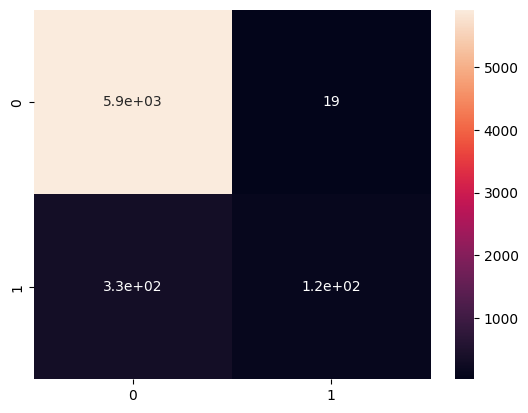

In [ ]:
# Split train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train['label'], test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = nb_classifier.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix,annot=True)